In [1]:
# Import libraries
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
bookings = pd.read_csv('/Users/priya/Documents/Applications of AI/Module 3/bookings.csv')

In [3]:
bookings.shape

(119210, 54)

In [4]:
bookings.head()

Unnamed: 0  is_canceled  lead_time  arrival_date_week_number  \
0           0            0        342                        27   
1           1            0        737                        27   
2           2            0          7                        27   
3           3            0         13                        27   
4           4            0         14                        27   

   arrival_date_day_of_month  arrival_date_month  stays_in_weekend_nights  \
0                          1                   7                        0   
1                          1                   7                        0   
2                          1                   7                        0   
3                          1                   7                        0   
4                          1                   7                        0   

   stays_in_week_nights  adults  children  ...  reserved_room_type_G  \
0                     0       2       0.0  ...                     0   
1                     0       2       0.0  ...                     0   
2                     1       1       0.0  ...                     0   
3                     1       1       0.0  ...                     0   
4                     2       2       0.0  ...                     0   

   reserved_room_type_H  reserved_room_type_L  deposit_type_No_Deposit  \
0                     0                     0                        1   
1                     0                     0                        1   
2                     0                     0                        1   
3                     0                     0                        1   
4                     0                     0                        1   

   deposit_type_Non_Refund  deposit_type_Refundable  customer_type_Contract  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0                    0                        1                              0  
1                    0                        1                              0  
2                    0                        1                              0  
3                    0                        1                              0  
4                    0                        1                              0  

[5 rows x 54 columns]

In [5]:
bookings.describe()

Unnamed: 0    is_canceled      lead_time  arrival_date_week_number  \
count  119210.000000  119210.000000  119210.000000             119210.000000   
mean    59604.500000       0.370766     104.109227                 27.163376   
std     34413.107132       0.483012     106.875450                 13.601107   
min         0.000000       0.000000       0.000000                  1.000000   
25%     29802.250000       0.000000      18.000000                 16.000000   
50%     59604.500000       0.000000      69.000000                 28.000000   
75%     89406.750000       1.000000     161.000000                 38.000000   
max    119209.000000       1.000000     737.000000                 53.000000   

       arrival_date_day_of_month  arrival_date_month  stays_in_weekend_nights  \
count              119210.000000       119210.000000            119210.000000   
mean                   15.798717            6.552051                 0.927053   
std                     8.781070            3.089796                 0.995117   
min                     1.000000            1.000000                 0.000000   
25%                     8.000000            4.000000                 0.000000   
50%                    16.000000            7.000000                 1.000000   
75%                    23.000000            9.000000                 2.000000   
max                    31.000000           12.000000                19.000000   

       stays_in_week_nights         adults       children  ...  \
count         119210.000000  119210.000000  119206.000000  ...   
mean               2.499195       1.859206       0.104047  ...   
std                1.897106       0.575186       0.398842  ...   
min                0.000000       0.000000       0.000000  ...   
25%                1.000000       2.000000       0.000000  ...   
50%                2.000000       2.000000       0.000000  ...   
75%                3.000000       2.000000       0.000000  ...   
max               50.000000      55.000000      10.000000  ...   

       reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  \
count         119210.000000         119210.000000         119210.000000   
mean               0.017549              0.005042              0.000050   
std                0.131305              0.070825              0.007094   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       deposit_type_No_Deposit  deposit_type_Non_Refund  \
count            119210.000000            119210.000000   
mean                  0.876277                 0.122364   
std                   0.329266                 0.327707   
min                   0.000000                 0.000000   
25%                   1.000000                 0.000000   
50%                   1.000000                 0.000000   
75%                   1.000000                 0.000000   
max                   1.000000                 1.000000   

       deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
count            119210.000000           119210.000000        119210.000000   
mean                  0.001359                0.034158             0.004815   
std                   0.036839                0.181636             0.069223   
min                   0.000000                0.000000             0.000000   
25%                   0.000000                0.000000             0.000000   
50%                   0.000000                0.000000             0.000000   
75%                   0.000000                0.000000             0.000000   
max                   1.000000                1.000000             1.000000   

       customer_type_Transient  customer_typ

In [6]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   arrival_date_month              119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119206 non-null  float64
 10  babies                          119210 non-null  int64  
 11  is_repeated_guest               119210 non-null  int64  
 12  previous_cancell

In [7]:
!pip install graphviz

You should consider upgrading via the 'c:\users\priya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
#total count of cancelled bookings and not cancelled bookings
bookings["is_canceled"].value_counts()

#percentage of cancelled and not cancelled
bookings["is_canceled"].value_counts()/bookings['is_canceled'].count()*100

0    75011
1    44199
Name: is_canceled, dtype: int64

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

<AxesSubplot:title={'center':'Cancelled v/s Non-cancelled booking'}, xlabel='booking status', ylabel='count'>

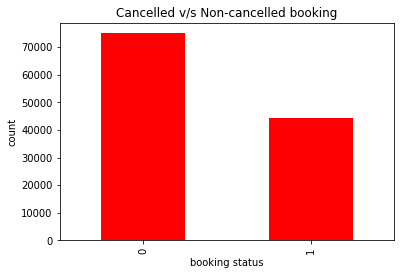

In [38]:
#plotting the details
bookings["is_canceled"].value_counts().plot(kind='bar',color = 'red',title ='Cancelled v/s Non-cancelled booking',xlabel ='booking status',ylabel='count')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

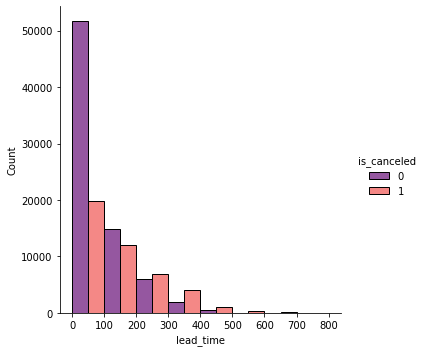

In [40]:
#effect of lead time on cancellation
sns.displot(bookings,x='lead_time',hue ='is_canceled',binwidth=100,multiple='dodge',palette='magma')

With increasing lead time the number of bookings canceled is increasing when compared to bookings which are not canceled


<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='count'>

Text(0.5, 1.0, 'bookings on different week of the year')

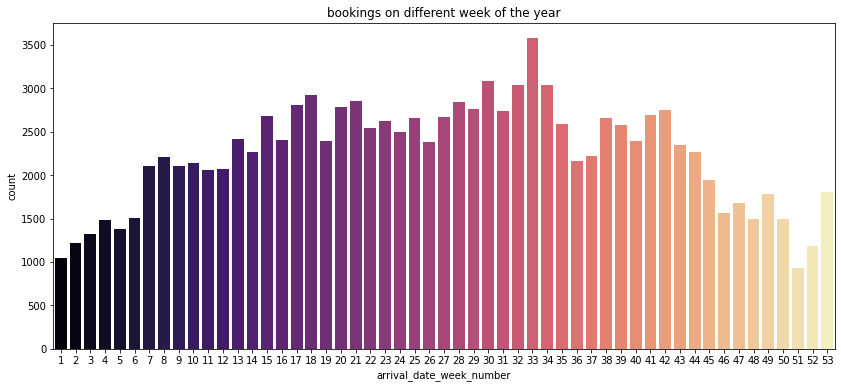

In [41]:
#which week of year expereince more bookings
plt.figure(figsize=(14,6))
sns.countplot(data = bookings,x = 'arrival_date_week_number',palette='magma')
plt.title('bookings on different week of the year')

33rd week of the year have seen maximum number of bookings

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'arrival_date_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>],
       [<AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'

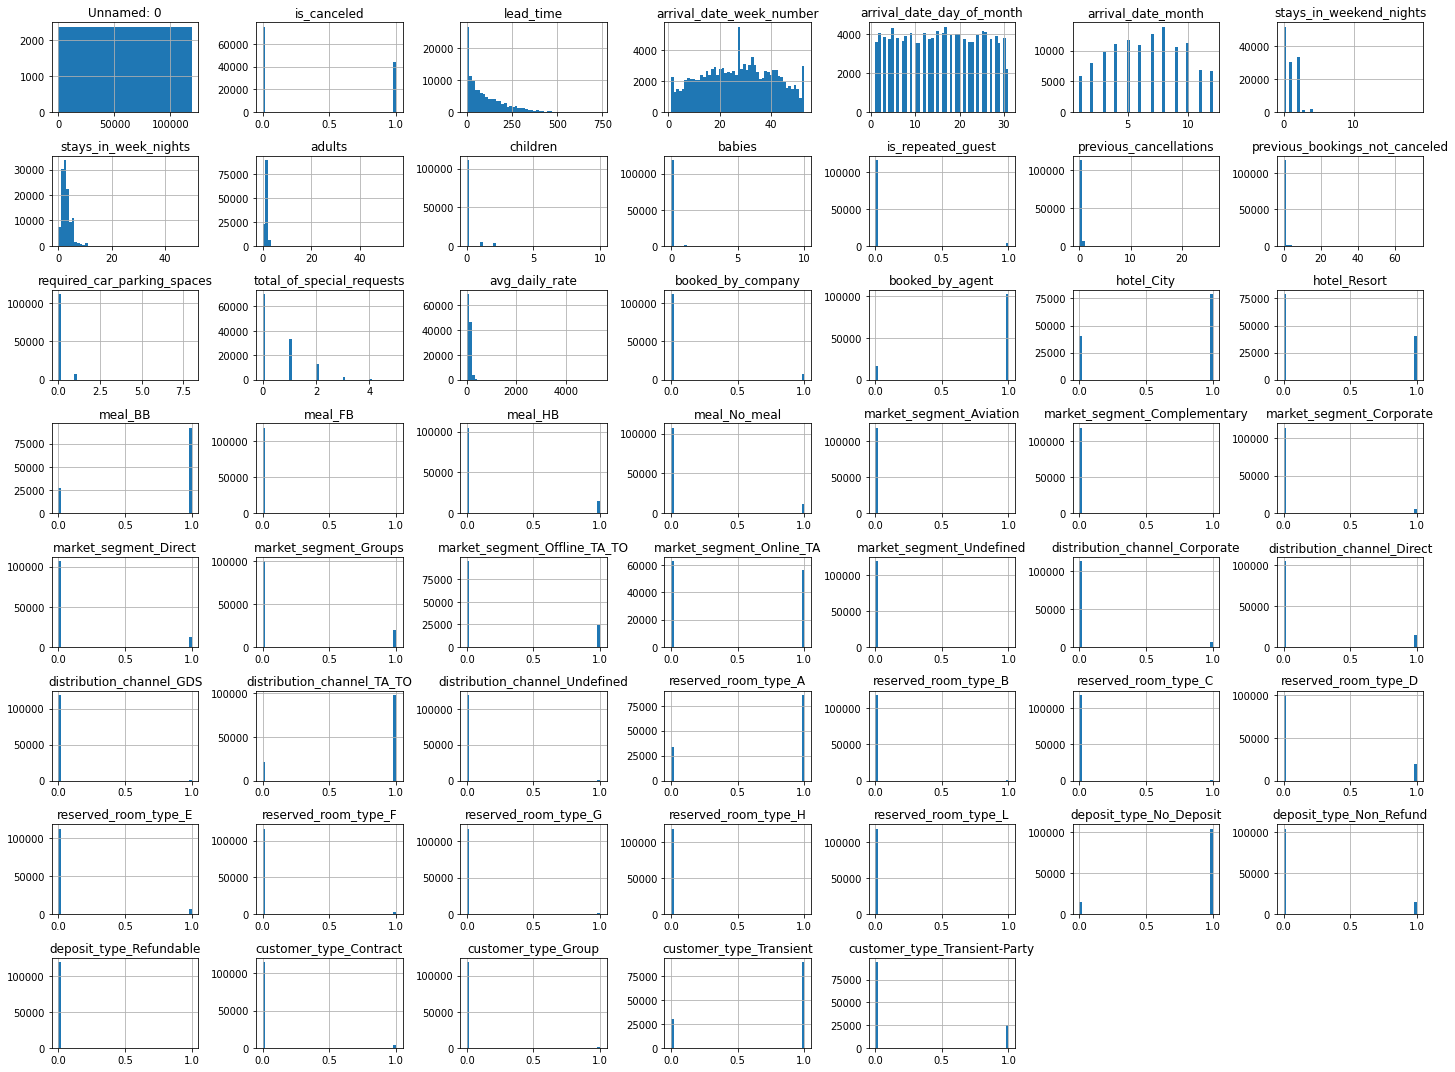

In [22]:
#histogram for each numerical attribute
# a histogram plot for each numerical attribute
bookings.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

Initial observations from the histograms:

Some weeks have more bookings. This could be because of holiday or summer seasons, when people tend to travel more.
According to the lead_time plot, most bookings were made shortly before arrival.
Bookings tend to be without children or babies.
It seems that the most accommodations are two weeks long or shorter.
While most bookings were not canceled, there are thousands of instances that were.

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

Text(0.5, 1.0, 'Special Requests')

Text(0.5, 0, 'Number of Special Requests')

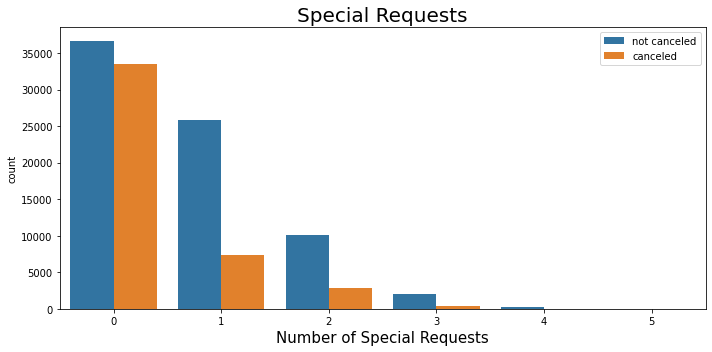

In [23]:
# plot special requests according to cancellations
plt.figure(figsize=(10,5))
sns.countplot(x=bookings["total_of_special_requests"], hue=bookings["is_canceled"])
plt.title("Special Requests", size=20)
plt.xlabel("Number of Special Requests", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

Observations:
Nearly half of the bookings without special requests are canceled.
There are fewer cancellations when the number of special requests increases.

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='deposit_type_No_Deposit', ylabel='count'>

Text(0.5, 1.0, 'Cancellations According to deposit type-No deposit')

Text(0.5, 0, 'No-Deposit')

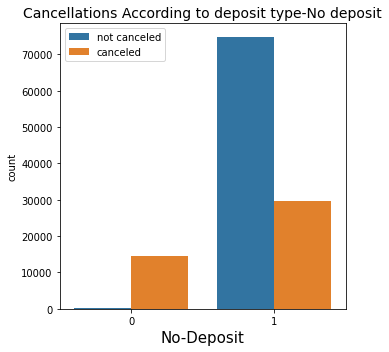

In [48]:
# plot deposit type according to cancellations
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["deposit_type_No_Deposit"], hue=bookings["is_canceled"])
plt.title("Cancellations According to deposit type-No deposit", size=14)
plt.xlabel("No-Deposit", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='deposit_type_Non_Refund', ylabel='count'>

Text(0.5, 1.0, 'Cancellations According to deposit type-Non-Refundable')

Text(0.5, 0, 'Non Refundable Depsoit')

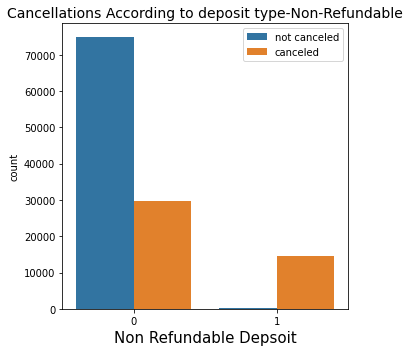

In [49]:
# plot deposit type according to cancellations
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["deposit_type_Non_Refund"], hue=bookings["is_canceled"])
plt.title("Cancellations According to deposit type-Non-Refundable", size=14)
plt.xlabel("Non Refundable Depsoit", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='deposit_type_Refundable', ylabel='count'>

Text(0.5, 1.0, 'Cancellations According to deposit type-Refundable')

Text(0.5, 0, 'Refundable Depsoit')

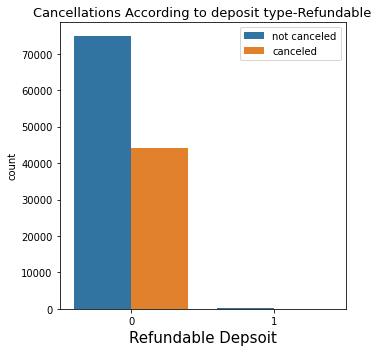

In [51]:
# plot deposit type according to cancellations
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["deposit_type_Refundable"], hue=bookings["is_canceled"])
plt.title("Cancellations According to deposit type-Refundable", size=13)
plt.xlabel("Refundable Depsoit", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='adults', ylabel='count'>

Text(0.5, 1.0, 'Cancellations with bookings consisting of adults')

Text(0.5, 0, 'Adult')

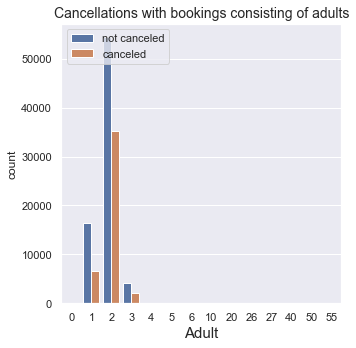

In [55]:
# Effect of Adult bookings in relation to cancellation
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["adults"], hue=bookings["is_canceled"])
plt.title("Cancellations with bookings consisting of adults", size=14)
plt.xlabel("Adult", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='children', ylabel='count'>

Text(0.5, 1.0, 'Cancellations with bookings consisting of children')

Text(0.5, 0, 'Children')

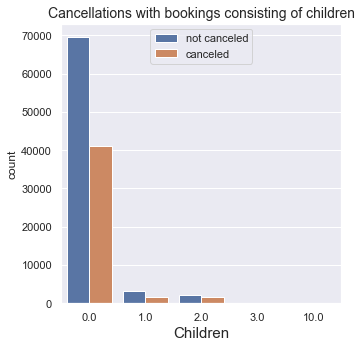

In [56]:
# Effect of Children bookings in relation to cancellation
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["children"], hue=bookings["is_canceled"])
plt.title("Cancellations with bookings consisting of children", size=14)
plt.xlabel("Children", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='babies', ylabel='count'>

Text(0.5, 1.0, 'Cancellations with bookings consisting of babies')

Text(0.5, 0, 'babies')

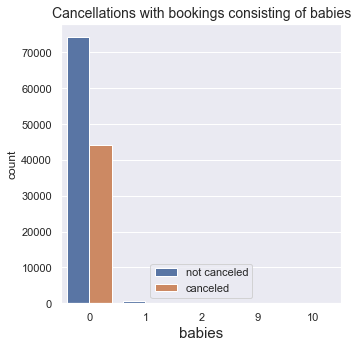

In [57]:
# Effect of bookings consisting babies in relation to cancellation
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["babies"], hue=bookings["is_canceled"])
plt.title("Cancellations with bookings consisting of babies", size=14)
plt.xlabel("babies", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

Text(0.5, 1.0, 'Cancellations with bookings from repeated guests')

Text(0.5, 0, 'repeated guest')

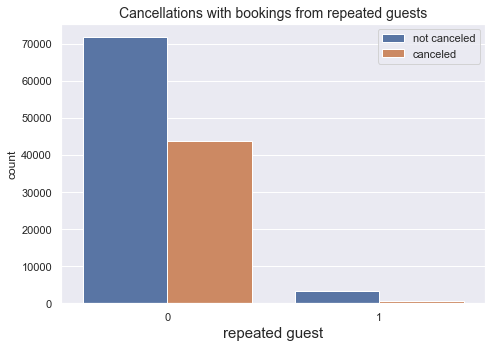

In [58]:
# Effect of bookings consisting of repeated guest in relation to cancellation
plt.figure(figsize=(7,5))
sns.countplot(x=bookings["is_repeated_guest"], hue=bookings["is_canceled"])
plt.title("Cancellations with bookings from repeated guests", size=14)
plt.xlabel("repeated guest", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='booked_by_company', ylabel='count'>

Text(0.5, 1.0, 'Cancellations when booked by company')

Text(0.5, 0, 'booked by company')

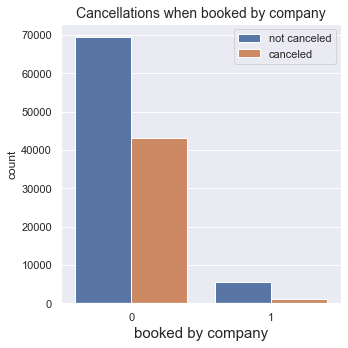

In [59]:
# Effect of bookings when booked by company in relation to cancellation
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["booked_by_company"], hue=bookings["is_canceled"])
plt.title("Cancellations when booked by company", size=14)
plt.xlabel("booked by company", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='booked_by_agent', ylabel='count'>

Text(0.5, 1.0, 'Cancellations when booked by agent')

Text(0.5, 0, 'booked by agent')

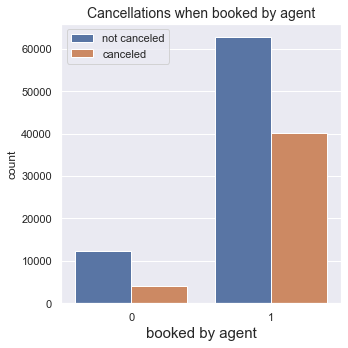

In [60]:
# Effect of bookings when booked by agent in relation to cancellation
plt.figure(figsize=(5,5))
sns.countplot(x=bookings["booked_by_agent"], hue=bookings["is_canceled"])
plt.title("Cancellations when booked by agent", size=14)
plt.xlabel("booked by agent", size=15)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

<AxesSubplot:>

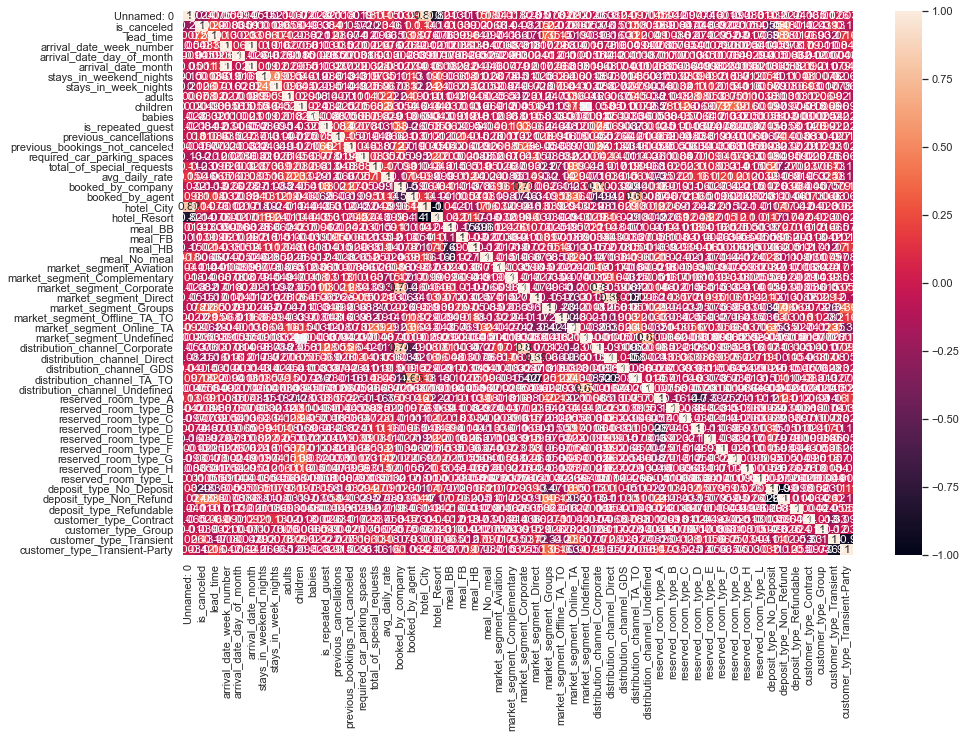

In [54]:
correlation = bookings.corr()
sns.heatmap(correlation,xticklabels= correlation.columns,yticklabels=correlation.columns,annot = True)
sns.set(rc={'figure.figsize':(17,12)})

In [24]:
sns.pairplot(bookings)

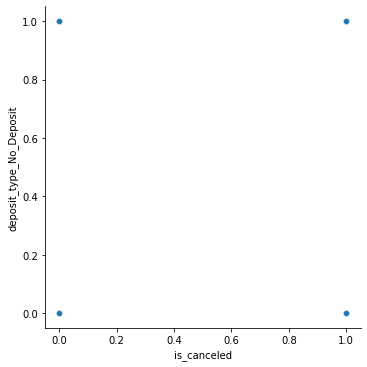

In [26]:
sns.relplot(x='is_canceled',y='deposit_type_No_Deposit',data = bookings)

In [61]:
# # plt.figure(figsize=(11,5))

# babies = bookings["babies"].value_counts()
# sns.barplot(x=babies, hue = target,palette='rainbow', ci=None)
# # plt.legend(["Winter", "Spring","Summer","Fall"],loc='upper right',bbox_to_anchor=(1.2,0.5))
# # plt.xlabel('count')
# # plt.ylabel('Total number of babies')
# # plt.title('Number of babies in cancelled and non cancelled')
# # warnings.filterwarnings("ignore")

In [10]:
#splitting the data into training and test sets
# Define X and y
X, y = bookings.iloc[:,2:], bookings.iloc[:,1]

X.head()



lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0        342                        27                          1   
1        737                        27                          1   
2          7                        27                          1   
3         13                        27                          1   
4         14                        27                          1   

   arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  adults  \
0                   7                        0                     0       2   
1                   7                        0                     0       2   
2                   7                        0                     1       1   
3                   7                        0                     1       1   
4                   7                        0                     2       2   

   children  babies  is_repeated_guest  ...  reserved_room_type_G  \
0       0.0       0                  0  ...                     0   
1       0.0       0                  0  ...                     0   
2       0.0       0                  0  ...                     0   
3       0.0       0                  0  ...                     0   
4       0.0       0                  0  ...                     0   

   reserved_room_type_H  reserved_room_type_L  deposit_type_No_Deposit  \
0                     0                     0                        1   
1                     0                     0                        1   
2                     0                     0                        1   
3                     0                     0                        1   
4                     0                     0                        1   

   deposit_type_Non_Refund  deposit_type_Refundable  customer_type_Contract  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       0   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0                    0                        1                              0  
1                    0                        1                              0  
2                    0                        1                              0  
3                    0                        1                              0  
4                    0                        1                              0  

[5 rows x 52 columns]

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=1234)





In [13]:
X_train.head()
X_test.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
73892         272                        29                         16   
68208         164                        20                         15   
20795           0                         7                         10   
69662         230                        23                          4   
110739          0                        18                          2   

        arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  \
73892                    7                        0                     2   
68208                    5                        1                     2   
20795                    2                        0                     3   
69662                    6                        2                     2   
110739                   5                        0                     2   

        adults  children  babies  is_repeated_guest  ...  \
73892        2       0.0       0                  0  ...   
68208        1       0.0       0                  0  ...   
20795        2       0.0       0                  1  ...   
69662        2       0.0       0                  0  ...   
110739       2       0.0       0                  0  ...   

        reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  \
73892                      0                     0                     0   
68208                      0                     0                     0   
20795                      0                     0                     0   
69662                      0                     0                     0   
110739                     0                     0                     0   

        deposit_type_No_Deposit  deposit_type_Non_Refund  \
73892                         1                        0   
68208                         0                        1   
20795                         1                        0   
69662                         0                        1   
110739                        1                        0   

        deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
73892                         0                       1                    0   
68208                         0                       0                    0   
20795                         0                       0                    0   
69662                         0                       0                    0   
110739                        0                       0                    0   

        customer_type_Transient  customer_type_Transient-Party  
73892                         0                              0  
68208                         1                              0  
20795                         0                              1  
69662                         1                              0  
110739                        1                              0  

[5 rows x 52 columns]

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
29740         147                        44                         29   
99687         252                        42                         15   
28164         171                        39                         19   
107501        211                        11                         13   
114900        166                        26                         26   

        arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  \
29740                   10                        2                     5   
99687                   10                        2                     1   
28164                    9                        1                     3   
107501                   3                        1                     2   
114900                   6                        1                     4   

        adults  children  babies  is_repeated_guest  ...  \
29740        2       0.0       0                  0  ...   
99687        2       0.0       0                  0  ...   
28164        2       0.0       0                  0  ...   
107501       1       0.0       0                  0  ...   
114900       2       0.0       0                  0  ...   

        reserved_room_type_G  reserved_room_type_H  reserved_room_type_L  \
29740                      0                     0                     0   
99687                      0                     0                     0   
28164                      0                     0                     0   
107501                     0                     0                     0   
114900                     0                     0                     0   

        deposit_type_No_Deposit  deposit_type_Non_Refund  \
29740                         1                        0   
99687                         1                        0   
28164                         1                        0   
107501                        1                        0   
114900                        1                        0   

        deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
29740                         0                       0                    0   
99687                         0                       0                    0   
28164                         0                       0                    0   
107501                        0                       0                    0   
114900                        0                       0                    0   

        customer_type_Transient  customer_type_Transient-Party  
29740                         1                              0  
99687                         1                              0  
28164                         1                              0  
107501                        1                              0  
114900                        1                              0  

[5 rows x 52 columns]

In [14]:
y_train.head()
y_test.head()

73892     1
68208     1
20795     0
69662     1
110739    0
Name: is_canceled, dtype: int64

29740     0
99687     0
28164     0
107501    0
114900    0
Name: is_canceled, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=1234)

# Instatiate a XGBClassifier and call it xgb_clf
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [11]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=123, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=True,
              validate_parameters=None, verbosity=None)

C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [12]:
#calculating the accuracy
xgb1_accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

#printing the baseline accuracy
print("Baseline accuracy:",xgb1_accuracy)

Baseline accuracy: 0.814616166751398


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

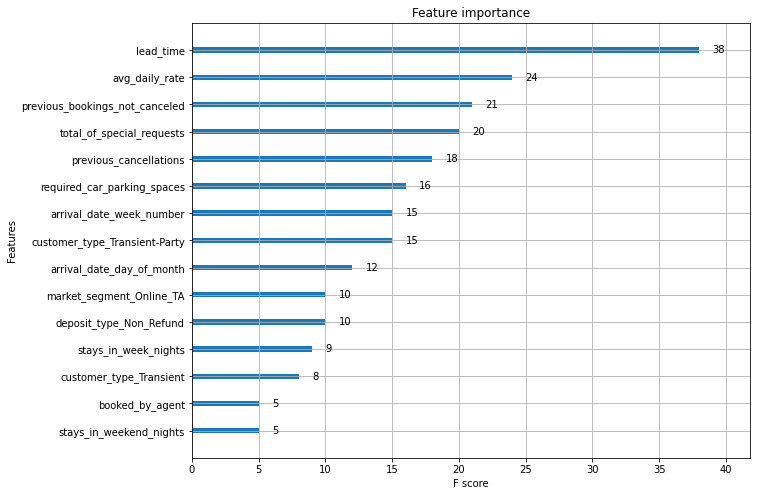

In [13]:
#plotting feature importance

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf, max_num_features = 15)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

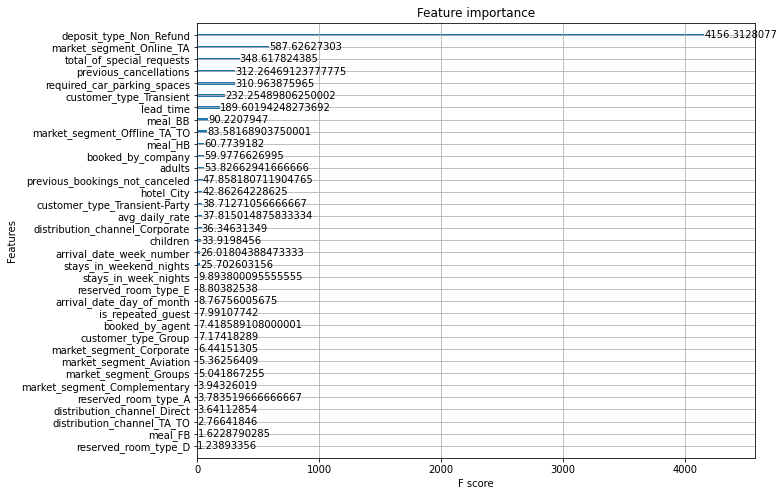

In [14]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

In [16]:
# matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# # Plot the first tree
# xgb.plot_tree(xgb_clf, num_trees=0)

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1, total=   0.9s
[CV] subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[03:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1, total=   0.9s
[CV] subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1 
[03:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=10, max_depth=5, learning_rate=0.22777777777777777, alpha=1, total=   0.8s
[CV] subsample=1, n_estimators=40, max_depth=6, learning_rate=0.1188

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   44.3s finished


[03:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0, 0.001, 0.01, 0.1, 1],
                                        'learning_rate': array([0.01      , 0.06444444, 0.11888889, 0.173

Best parameters found:  {'subsample': 0.5, 'n_estimators': 40, 'max_depth': 10, 'learning_rate': 0.17333333333333334, 'alpha': 0.001}
Best accuracy found:  0.8358082073788857


In [18]:
rs_param_grid_2 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(4,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.001,0.01,0.1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.25,0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,1, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [20, 35, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_2 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_2 = RandomizedSearchCV(estimator=xgb_clf_2,param_distributions=rs_param_grid_2, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_2.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_2.best_params_)
print("Best accuracy found: ", xgb_rs_2.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01 
[04:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01, total=   1.7s
[CV] subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01 
[04:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01, total=   1.8s
[CV] subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01 
[04:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=35, max_depth=6, learning_rate=0.78, alpha=0.01, total=   1.6s
[CV] subsample=0.75, n_estimators=40, max_depth=11, learning_rate=0.56, alpha=0.01 
[04:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   29.3s finished


[04:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'alpha': [0, 0.001, 0.001, 0.01, 0.1],
                                        '

Best parameters found:  {'subsample': 0.75, 'n_estimators': 40, 'max_depth': 11, 'learning_rate': 0.56, 'alpha': 0.01}
Best accuracy found:  0.8360084996754301


In [19]:
rs_param_grid_3 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(4,13))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.001,0.01,0.1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.1,1, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [30, 35, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_3 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_3 = RandomizedSearchCV(estimator=xgb_clf_3,param_distributions=rs_param_grid_3, 
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_3.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_3.best_params_)
print("Best accuracy found: ", xgb_rs_3.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01 
[04:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01, total=   1.4s
[CV] subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01 
[04:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01, total=   1.5s
[CV] subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01 
[04:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=35, max_depth=5, learning_rate=0.4, alpha=0.01, total=   1.4s
[CV] subsample=0.75, n_estimators=40, max_depth=12, learning_rate=0.2, alpha=0.01 
[04:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75,

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   34.3s finished


[04:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'alpha': [0, 0.001, 

Best parameters found:  {'subsample': 0.75, 'n_estimators': 40, 'max_depth': 12, 'learning_rate': 0.2, 'alpha': 0.01}
Best accuracy found:  0.842018299876655


In [20]:
rs_param_grid_4 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(5,14))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.1,0.01, 0.01,0.1,0.01],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.45,0.65,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.1,1, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [40, 45, 40]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_4 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_4 = RandomizedSearchCV(estimator=xgb_clf_4,param_distributions=rs_param_grid_4, 
                                cv=4, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_4.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_4.best_params_)
print("Best accuracy found: ", xgb_rs_4.best_score_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1 
[04:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1, total=   2.4s
[CV] subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1 
[04:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1, total=   2.2s
[CV] subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1 
[04:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1, total=   2.1s
[CV] subsample=0.75, n_estimators=45, max_depth=6, learning_rate=0.4, alpha=0.1 
[04:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_es

[CV]  subsample=0.75, n_estimators=40, max_depth=7, learning_rate=0.9, alpha=0.01, total=   2.2s
[CV] subsample=0.75, n_estimators=40, max_depth=7, learning_rate=0.9, alpha=0.01 
[04:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=40, max_depth=7, learning_rate=0.9, alpha=0.01, total=   2.4s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


[04:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'alpha': [0.1, 0.01, 0.01, 0.1, 0.01],
                                        '

Best parameters found:  {'subsample': 0.75, 'n_estimators': 40, 'max_depth': 13, 'learning_rate': 0.2, 'alpha': 0.1}
Best accuracy found:  0.8439839403134162


In [21]:
rs_param_grid_5 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(9,18))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.1,0.01, 0.01,0.1,0.01],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.75,0.1,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.5,1, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [60, 55, 50]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_5 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_5 = RandomizedSearchCV(estimator=xgb_clf_5,param_distributions=rs_param_grid_5, 
                                cv=5, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_5.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_5.best_params_)
print("Best accuracy found: ", xgb_rs_5.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1, total=   4.9s
[CV] subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[04:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1, total=   4.7s
[CV] subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1 
[04:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=10, learning_rate=0.6666666666666666, alpha=0.1, total=   4.7s
[CV] subsample=0.75, n_estimators=55, max_depth=10, learnin

[04:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=14, learning_rate=0.8888888888888888, alpha=0.1, total=   6.9s
[CV] subsample=0.75, n_estimators=55, max_depth=14, learning_rate=0.8888888888888888, alpha=0.1 
[04:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=14, learning_rate=0.8888888888888888, alpha=0.1, total=   6.9s
[CV] subsample=0.75, n_estimators=55, max_depth=14, learnin

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.1min finished


[04:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.1, 0.01, 0.01, 0.1, 0.01],
                                        'learning_rate': array([0.5       , 0.55555556, 0.61111111, 0

Best parameters found:  {'subsample': 0.75, 'n_estimators': 50, 'max_depth': 17, 'learning_rate': 0.5555555555555556, 'alpha': 0.1}
Best accuracy found:  0.8442093401777889


In [25]:
rs_param_grid_6 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(11,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.1,0.1, 0.1,0.1,0.1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [1,0.75,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.5,1, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [50, 55, 45]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_6 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_6 = RandomizedSearchCV(estimator=xgb_clf_6,param_distributions=rs_param_grid_6, 
                                cv=5, n_iter=7, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_6.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_6.best_params_)
print("Best accuracy found: ", xgb_rs_6.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1, total=  12.3s
[CV] subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[06:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1, total=   9.8s
[CV] subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1 
[06:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1, total=  11.8s
[CV] subsample=0.75, n_estimators=55, max_depth=15, learning_rate=1.0, alpha=0.1 
[06:19:12] WARNING: C:

[06:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=50, max_depth=15, learning_rate=0.9444444444444444, alpha=0.1, total=   7.4s
[CV] subsample=0.75, n_estimators=50, max_depth=15, learning_rate=0.9444444444444444, alpha=0.1 
[06:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=50, max_depth=15, learning_rate=0.9444444444444444, alpha=0.1, total=  10.6s
[CV] subsample=0.75, n_estimators=50, max_depth=15, learnin

[06:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.6111111111111112, alpha=0.1, total=   9.7s
[CV] subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.6111111111111112, alpha=0.1 
[06:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.6111111111111112, alpha=0.1, total=  13.0s


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  5.7min finished


[06:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.1, 0.1, 0.1, 0.1, 0.1],
                                        'learning_rate': array([0.5       , 0.55555556, 0.61111111, 0.66

Best parameters found:  {'subsample': 0.75, 'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.6111111111111112, 'alpha': 0.1}
Best accuracy found:  0.8441717791411042


In [26]:
rs_param_grid_7 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(13,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.12,0.15, 0.16,0.17,0.19],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.80,0.75,0.75,0.90],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.5,0.7, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [57, 55, 54]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_7 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_7 = RandomizedSearchCV(estimator=xgb_clf_7,param_distributions=rs_param_grid_7, 
                                cv=5, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_7.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_7.best_params_)
print("Best accuracy found: ", xgb_rs_7.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16 
[06:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16, total=  11.9s
[CV] subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s


[06:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16, total=   8.5s
[CV] subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16 
[06:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=57, max_depth=13, learning_rate=0.6777777777777777, alpha=0.16, total=  10.8s
[CV] subsample=0.75, n_estimators=57, max_depth=13, lear

[06:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.5888888888888889, alpha=0.19, total=  12.1s
[CV] subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.5888888888888889, alpha=0.19 
[06:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.75, n_estimators=55, max_depth=16, learning_rate=0.5888888888888889, alpha=0.19, total=   9.2s
[CV] subsample=0.75, n_estimators=55, max_depth=16, lear

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.9min finished


[06:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.12, 0.15, 0.16, 0.17, 0.19],
                                        'learning_rate': array([0.5       , 0.52222222, 0.54444444,

Best parameters found:  {'subsample': 0.9, 'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.5666666666666667, 'alpha': 0.16}
Best accuracy found:  0.8459621885564041


In [16]:
from sklearn.model_selection import RandomizedSearchCV
rs_param_grid_8 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(16,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.169,0.155, 0.16,0.17,0.167],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.87,0.85,0.89,0.90],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.5,0.6, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [55, 55, 55]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_8 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_8 = RandomizedSearchCV(estimator=xgb_clf_8,param_distributions=rs_param_grid_8, 
                                cv=6, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_8.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_8.best_params_)
print("Best accuracy found: ", xgb_rs_8.best_score_)

Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167, total=   6.1s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167 
[18:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s



[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167, total=   7.2s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167 
[18:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167, total=  13.4s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5222222222222223, alpha=0.167 
[18:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met

[18:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5666666666666667, alpha=0.16, total=   8.8s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5666666666666667, alpha=0.16 
[18:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5666666666666667, alpha=0.16, total=   8.5s
[CV] subsample=0.89, n_estimators=55, max_depth=16, lear

[18:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.85, n_estimators=55, max_depth=16, learning_rate=0.5111111111111111, alpha=0.169, total=   8.5s
[CV] subsample=0.85, n_estimators=55, max_depth=16, learning_rate=0.5111111111111111, alpha=0.169 
[18:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.85, n_estimators=55, max_depth=16, learning_rate=0.5111111111111111, alpha=0.169, total=   8.2s


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.6min finished


[18:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.169, 0.155, 0.16, 0.17,
                                                  0.167],
                                        'learn

Best parameters found:  {'subsample': 0.89, 'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.5111111111111111, 'alpha': 0.17}
Best accuracy found:  0.8486916428241463


In [17]:
rs_param_grid_9 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(16,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.169,0.155, 0.16,0.17,0.167],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.87,0.88,0.89,0.90],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.51,0.56, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [55, 55, 55]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_9 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_9 = RandomizedSearchCV(estimator=xgb_clf_9,param_distributions=rs_param_grid_9, 
                                cv=7, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_9.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_9.best_params_)
print("Best accuracy found: ", xgb_rs_9.best_score_)

Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[18:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167, total=   5.9s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[18:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s



[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167, total=   6.2s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[18:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167, total=   9.9s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[18:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_met

[18:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5155555555555555, alpha=0.17, total=   9.2s
[CV] subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5155555555555555, alpha=0.17 
[18:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5155555555555555, alpha=0.17, total=   8.8s
[CV] subsample=0.89, n_estimators=55, max_depth=16, lear

[18:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, max_depth=16, learning_rate=0.5544444444444445, alpha=0.169, total=   8.6s
[CV] subsample=0.88, n_estimators=55, max_depth=16, learning_rate=0.5155555555555555, alpha=0.169 
[18:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.88, n_estimators=55, max_depth=16, learning_rate=0.5155555555555555, alpha=0.169, total=   8.3s
[CV] subsample=0.88, n_estimators=55, max_depth=16, l

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  6.5min finished


[18:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.169, 0.155, 0.16, 0.17,
                                                  0.167],
                                        'learn

Best parameters found:  {'subsample': 0.89, 'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.5211111111111111, 'alpha': 0.167}
Best accuracy found:  0.8493051208213347


In [18]:
rs_param_grid_10 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(16,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.169,0.155, 0.16,0.17,0.167],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.87,0.88,0.89,0.90],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.51,0.56, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [55, 55, 55],
    'min_sample_leaf':[50,60,70]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_10 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_10 = RandomizedSearchCV(estimator=xgb_clf_10,param_distributions=rs_param_grid_10, 
                                cv=7, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_10.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_10.best_params_)
print("Best accuracy found: ", xgb_rs_10.best_score_)

Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[19:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  subsample=0.89, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167, total=   6.1s
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[19:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s



[CV]  subsample=0.89, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167, total=   6.1s
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5211111111111111, alpha=0.167 
[19:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, min_

[19:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.88, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5544444444444445, alpha=0.17, total=   8.2s
[CV] subsample=0.88, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5544444444444445, alpha=0.17 
[19:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:06:17] WARNING: C:/Users/Administrator/wor

[19:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.56, alpha=0.17, total=   8.1s
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.56, alpha=0.17 
[19:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[19:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.5155555555555555, alpha=0.17, total=   8.1s
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.5155555555555555, alpha=0.17 
[19:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:08:48] WARNING: C:/Users/Administrator/wor

[19:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.56, alpha=0.167, total=   7.9s
[CV] subsample=0.89, n_estimators=55, min_sample_leaf=50, max_depth=16, learning_rate=0.56, alpha=0.167 
[19:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  5.7min finished


[19:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.169, 0.155, 0.16, 0.17,
                                                  0.167],
                                        'learn

Best parameters found:  {'subsample': 0.89, 'n_estimators': 55, 'min_sample_leaf': 60, 'max_depth': 16, 'learning_rate': 0.5211111111111111, 'alpha': 0.167}
Best accuracy found:  0.8493051208213347


In [36]:
rs_param_grid_11 = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(16,17))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0.169,0.168, 0.165,0.166,0.167],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.895,0.887,0.896,0.893],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.525,0.54, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [55, 55, 55],
    'min_sample_leaf':[65,60,62]
    }


# Insantiate XGBoost Clasifier 
xgb_clf_11 = xgb.XGBClassifier(random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs_11 = RandomizedSearchCV(estimator=xgb_clf_11,param_distributions=rs_param_grid_11, 
                                cv=7, n_iter=6, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs_11.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs_11.best_params_)
print("Best accuracy found: ", xgb_rs_11.best_score_)

Fitting 7 folds for each of 6 candidates, totalling 42 fits
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5283333333333333, alpha=0.167 
[20:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\priya\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.896, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5283333333333333, alpha=0.167, total=   5.9s
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5283333333333333, alpha=0.167 
[20:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:52:01] WARNING: C:/Users/Administrator

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s



[CV]  subsample=0.896, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5283333333333333, alpha=0.167, total=   6.3s
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5283333333333333, alpha=0.167 
[20:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.896, n_estimators=55, m

[20:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.887, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5383333333333333, alpha=0.166, total=  11.5s
[CV] subsample=0.887, n_estimators=55, min_sample_leaf=60, max_depth=16, learning_rate=0.5383333333333333, alpha=0.166 
[20:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:53:47] WARNING: C:/Users/Administrator

[20:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.54, alpha=0.166, total=  14.7s
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.54, alpha=0.166 
[20:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.5266666666666667, alpha=0.166, total=   8.9s
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.5266666666666667, alpha=0.166 
[20:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:56:46] WARNING: C:/Users/Administrator

[20:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.54, alpha=0.167, total=   8.8s
[CV] subsample=0.896, n_estimators=55, min_sample_leaf=65, max_depth=16, learning_rate=0.54, alpha=0.167 
[20:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_sample_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  6.8min finished


[20:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'alpha': [0.169, 0.168, 0.165, 0.166,
                                                  0.167],
                                        'lea

Best parameters found:  {'subsample': 0.896, 'n_estimators': 55, 'min_sample_leaf': 60, 'max_depth': 16, 'learning_rate': 0.5283333333333333, 'alpha': 0.167}
Best accuracy found:  0.8493051208213347
